In [1]:
pip install yfinance


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install yfinance


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
pip install pandas-datareader


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install pandas-datareader


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


This section imports the necessary libraries for:

* Downloading stock data (yfinance)
* Data manipulation (pandas)
* Calculating returns (pandas)
* Statistical analysis (numpy, scipy)

In [11]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import datetime as dt 
import numpy as np 
from scipy.stats import norm

### Set time from to a certain number of years 


In [15]:
years = 10 

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta ( days = 365 * years )


In [17]:
endDate ,startDate

(datetime.datetime(2024, 12, 31, 1, 45, 41, 965971),
 datetime.datetime(2015, 1, 3, 1, 45, 41, 965971))

### Create a list of tickers 


In [21]:
tickers  = ['AAPL','BND','GLD','QQQ','VTI']


['AAPL', 'BND', 'GLD', 'QQQ', 'VTI']

### DOWNLOAD THE STOCK DATA FROM YF 


In [23]:
adj_close_df = pd.DataFrame ()

for ticker in tickers :
    data = yf.download ( ticker , start = startDate , end = endDate )
    adj_close_df[ticker] = data ['Close']

print (adj_close_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  AAPL        BND         GLD         QQQ         VTI
Date                                                                 
2015-01-05   23.661270  62.959381  115.800003   93.867729   87.635696
2015-01-06   23.663504  63.141651  117.120003   92.609100   86.777023
2015-01-07   23.995316  63.179619  116.430000   93.802917   87.812500
2015-01-08   24.917271  63.080898  115.940002   95.598320   89.361481
2015-01-09   24.943991  63.187252  117.260002   94.969002   88.620651
...                ...        ...         ...         ...         ...
2024-12-23  255.270004  71.747002  240.960007  522.869995  294.000000
2024-12-24  258.200012  71.849998  241.440002  529.960022  297.119995
2024-12-26  259.019989  71.900002  243.070007  529.599976  297.290009
2024-12-27  255.589996  71.750000  241.399994  522.559998  294.070007
2024-12-30  253.070007  72.044998  240.539902  518.549988  292.165009

[2514 rows x 5 columns]


### CALCULATING THE DAILY RETURNS and DROP NA 

In [34]:
log_returns = np.log ( adj_close_df / adj_close_df.shift(1) )
log_returns = log_returns.dropna()
print(log_returns)

                AAPL       BND       GLD       QQQ       VTI
Date                                                        
2015-01-06  0.000094  0.002891  0.011334 -0.013499 -0.009847
2015-01-07  0.013925  0.000601 -0.005909  0.012809  0.011862
2015-01-08  0.037703 -0.001564 -0.004217  0.018959  0.017486
2015-01-09  0.001072  0.001685  0.011321 -0.006605 -0.008325
2015-01-12 -0.024949  0.001321  0.011025 -0.010482 -0.007150
...              ...       ...       ...       ...       ...
2024-12-23  0.003060 -0.003190 -0.004720  0.009696  0.005666
2024-12-24  0.011413  0.001435  0.001990  0.013469  0.010556
2024-12-26  0.003171  0.000696  0.006728 -0.000680  0.000572
2024-12-27 -0.013331 -0.002088 -0.006894 -0.013382 -0.010890
2024-12-30 -0.009908  0.004103 -0.003569 -0.007703 -0.006499

[2513 rows x 5 columns]


### CALCULATE THE CUMULATIVE LOG RETURN 


In [108]:
cumulative_log_return = log_returns.cumsum()
cumulative_log_return

,AAPL,BND,GLD,QQQ,VTI
Date,,,,,
2015-01-06,0.000094,0.002891,0.011334,-0.013499,-0.009847
2015-01-07,0.014019,0.003492,0.005426,-0.000691,0.002015
2015-01-08,0.051722,0.001928,0.001208,0.018269,0.019501
2015-01-09,0.052793,0.003613,0.012529,0.011664,0.011177
2015-01-12,0.027844,0.004934,0.023555,0.001182,0.004027
...,...,...,...,...,...
2024-12-23,2.378482,0.130656,0.732766,1.717446,1.210391
2024-12-24,2.389895,0.132091,0.734756,1.730915,1.220948
2024-12-26,2.393066,0.132787,0.741485,1.730235,1.221520


<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

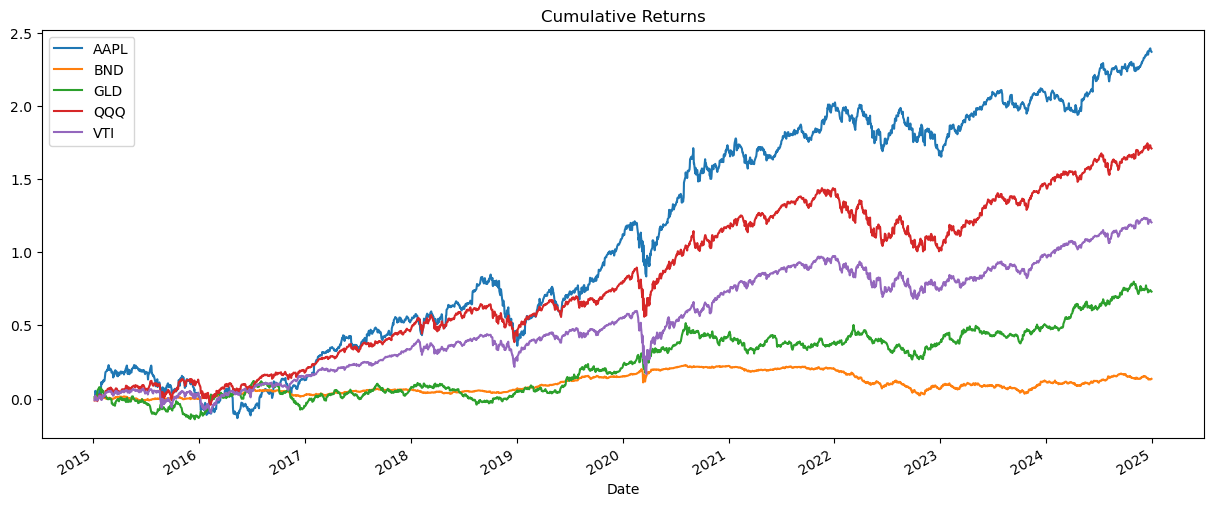

In [119]:
cumulative_log_return.plot(title = 'Cumulative Returns', figsize = (15,6))

### Create an equally weighted portfolio 

In [37]:
portfolio_value = 1000000
weights = np.array ([ 1/ len (tickers)] * len(tickers))
print (weights)

[0.2 0.2 0.2 0.2 0.2]


## Calculate the historical portfolio returns 


#### This tells you how much money your whole portfolio made or lost daily.

###### This section calculates the historical daily return of the entire portfolio by multiplying the daily returns of each stock by their weights and summing them up.

In [48]:
historical_return = ( log_returns * weights ).sum( axis = 1 ) 
print (historical_return)

Date
2015-01-06   -0.001805
2015-01-07    0.006658
2015-01-08    0.013673
2015-01-09   -0.000170
2015-01-12   -0.006047
                ...   
2024-12-23    0.002102
2024-12-24    0.007772
2024-12-26    0.002097
2024-12-27   -0.009317
2024-12-30   -0.004715
Length: 2513, dtype: float64


### FIND X-DAY HISTORICAL RETURNS


In [61]:
days = 5 
range_returns = historical_return.rolling(window=days).sum()
range_returns = range_returns.dropna()
print (range_returns)

Date
2015-01-12    0.012308
2015-01-13    0.014878
2015-01-14    0.005388
2015-01-15   -0.012579
2015-01-16   -0.007003
                ...   
2024-12-23   -0.011623
2024-12-24   -0.003168
2024-12-26    0.022341
2024-12-27    0.013072
2024-12-30   -0.002060
Length: 2509, dtype: float64


##### The higher we set the confidence interval The greater our VAR value is 

##### The higher we set the days The greater our VAR value is 


### SPECIFY CI AND CALCULATE THE VALUE AT RISK (VAR ) USING HISTORICAL METHOD 

In [94]:
confidence_interval = 0.95

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100)) * portfolio_value

print(VaR)

26565.74769172366


In [77]:
import matplotlib 
from matplotlib import pyplot as plt

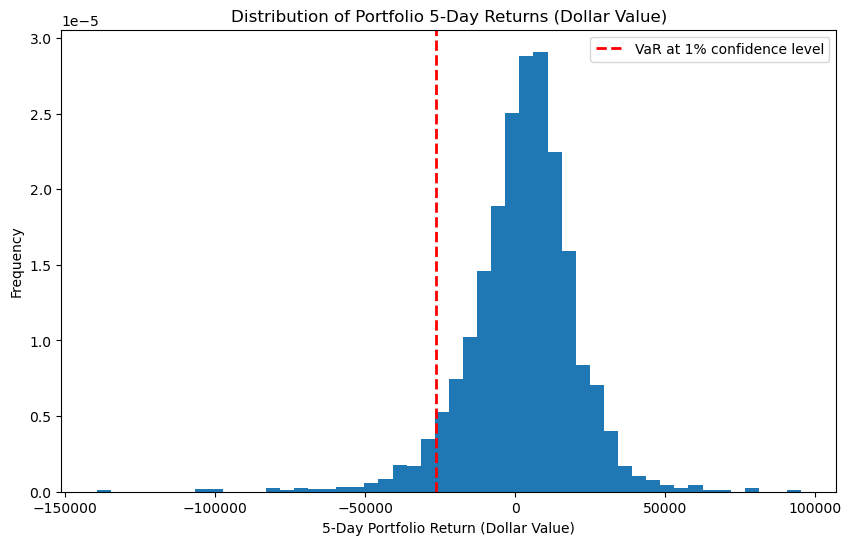

In [98]:
return_window = days 
range_returns = historical_return.rolling(window=return_window).sum()
range_returns = range_returns.dropna()
range_returns_dollar = range_returns * portfolio_value

plt.figure(figsize=(10, 6))
plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')

plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0f}% confidence level')
plt.legend()

plt.show()

* This number is the 95% Value at Risk (VaR). It means that if you hold your portfolio unchanged for 5 days,
* there’s a high likelihood (95%) that you’ll lose no more than $26,565.

  
* 5% Tail Risk: However, there’s still a 5% chance (5 out of 100 scenarios) that your losses will exceed $26,565, 
* which represents extreme or rare market events.

### Calculate the Expected Shortfall (ES) or Conditional Value at Risk (CVaR)
### ES is the average loss given that the loss exceeds the VaR


In [144]:
# First, filter returns that are less than the negative VaR
tail_losses = range_returns[range_returns < -VaR]

# Calculate the average of these tail losses
ES = -tail_losses.mean() * portfolio_value

print(f"Expected Shortfall (ES) at {confidence_interval*100}% confidence level: ${ES:,.2f}")

Expected Shortfall (ES) at 95.0% confidence level: $nan


###### ES = $nan: This indicates that there are no returns in your dataset that are worse than the calculated VaR. In other words, none of the 5-day rolling returns experienced a loss greater than the VaR threshold.

#### Check the VaR value:

In [146]:
print(f"VaR: {VaR}")


VaR: 26565.74769172366


In [149]:
# Ensure there are negative retur
print(f"Number of tail losses: {len(tail_losses)}")


Number of tail losses: 0


##### Since the number of tail_losses is zero, it indicates that there are no returns in your dataset that are worse than this threshold. 
##### In other words, no individual return in your data has a loss greater than $26,565.75.

 ### Stress Test
 
 #### Description:
- A stress test is applied to see how a 13% market drop would affect the portfolio value.

- stressed_portfolio_value is calculated by reducing the portfolio value by 13%.
- We calculate the loss amount due to this market downturn.



In [172]:
stressed_portfolio_value = portfolio_value * 0.87  # 10% market drop

print(f"Stress Test: Portfolio Value after 13% drop: ${stressed_portfolio_value:.2f}")

# Calculate the loss amount
loss_amount = portfolio_value - stressed_portfolio_value
print(f"Loss after 13% drop: ${loss_amount:,.2f}")

Stress Test: Portfolio Value after 13% drop: $870000.00
Loss after 13% drop: $130,000.00
